In [1]:
### Don't push "Run notebook"!!!

assert False, 'Please don\'t press the "Run notebook" button!'

# Imports & Loading Data

**Reminder:** you can use the table of contents in the bottom left to quickly navigate notebooks!

In [2]:
# Run this cell with Ctrl+Enter (or Cmd+Return on a Mac)

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from utils import *

# Set a plotting theme with seaborn
sns.set_theme()

# Load our data
print('Loading data from Datasets folder...')

(geo_cnty, rep, dem, rep_st, dem_st) = load_data()

print('Finished loading data!')

Loading data from Datasets folder...
Finished loading data!


# 4. Reading Between the Lines
<p style='font-size:30px'>Better Data Selection & Interpretation</p>

## What Makes a Winner?
<p style='font-size:20px'>Characterizing Counties Hillary Won</p>

In this example we'll try to figure out if there were any demographical reasons for why Hillary won the counties that she did. When we're done we'll have a plot like this:

![](.images/black_v_white_filtered.png)

To motivate 

>**Your turn**:  
We'll work with a plot from earlier. Create a `scatterplot()` comparing `black` on the y-axis and `white` on the x-axis in counties from the **Democratic** primary. Color the points by the `winner` of each county. It should look like this:
![](.images/black_v_white_dem.png)

>*Hint: use the **`hue`** argument to color by `winner`.*

In [3]:
### Enter your code below: ###



##############################

In [4]:
# Solution
# sns.scatterplot(data=dem, x='white', y='black', hue='winner');

As we noticed earlier, this plot is interesting because it has two "arms" stretching out from the bottom right with almost no counties in between. Furthermore, a large proportion of Hillary's counties are in the upper arm.

**We'd like to pick out counties in the upper arm that Hillary won for further analysis.**

How can we do this? We could imagine drawing a line to cut off the bottom arm and select it that way, but this would also select the counties falling in between the arms. Something like this:

<center>

![](.images/black_v_white_dem_simple_cut.png)

</center>

Instead, we can draw a line through the plot of the form $ y > mx + b$ to pick out everything above that line. Like so:

<center>

![](.images/black_v_white_dem_diag_cut.png)

</center>

Let's get an expression to select the upper arm. 

We'll start with the equation of a line:

$$ y > mx + b $$

Based on our plot's axes, we know `black` is the y variable and `white` is the x variable.

$$ \text{black} > m\cdot\text{white} + b $$

Now we just need to figure out what $m$ and $b$ should be. We can pick two points we want the line to connect and get an expression. We'll use $(0, 50)$ and $(50, 0)$ and the two-point equation of a line:

$$ y - y_1 = \frac{y_2 - y_1}{x_2 - x_1}(x - x_1) $$

$$ \text{black} - 50 > \frac{0 - 50}{50 - 0}(\text{white} - 0) $$

$$ \text{black} - 50 > \frac{-50}{50}\cdot \text{white} $$

$$ \text{black} > -1 \cdot \text{white} + 50 $$

$$ \text{black} + \text{white} > 50 $$

and more generally,

$$ \text{black} + \text{white} > \text{threshold} $$

Intuitively, the filter described above let's us select counties that are exclusively white and black. If $\text{threshold} = 50$, then that would mean only 50% of the population can be some other race. As we increase the threshold, this will select counties that are more exclusively white and black.

In code this would look like
```python
my_filter = df['white'] + df['black'] > threshold
```
where `df` is any of the four dataframes used in this project, `rep`, `dem`, `rep_st`, or `dem_st`. And now we could use
```python
df[my_filter]
```
to select the counties (or states if you use a state-level dataframe) that satisfy the filter.

**Warning: ** We don't want to ever create a variable called `filter` because it's a built-in Python function. You should always avoid naming variables after [built-in functions](https://docs.python.org/3/library/functions.html) to prevent bugs.

>**Your turn:**  
Start by adding the white percentage and black percentage together and compare this sum to a threshold, like 50%. Assign this to a new variable as shown in the example above and use this filter to pick out these counties from `dem`. Finally, plot the result of subsetting.  
*Hint: use the same code for the original scatter plot but instead pass the subset dataframe as the argument to `data`. Something like this: `data=df[my_filter]`*

In [5]:
### Enter your code below: ###



##############################

In [6]:
# Solution
# bnw_threshold = 50
# bnw_mask = dem['white'] + dem['black'] > bnw_threshold
# bnw = dem[bnw_mask]
# sns.scatterplot(data=bnw, x='white', y='black', hue='winner');

With the threshold at 50% we're still getting a fair amount of counties that aren't in the upper "arm". Let's try changing the threshold to something more stringent.

>**Your turn:**  
Instead of 50, try changing the threshold to something else and create a new plot using the updated threshold.

In [7]:
### Enter your code below: ###



##############################

In [8]:
# Solution

# bnw_threshold = 80
# bnw_mask = dem['white'] + dem['black'] > bnw_threshold
# bnw = dem[bnw_mask]
# sns.scatterplot(data=bnw, x='white', y='black', hue='winner');

Great job of picking out the upper arm! However, we're not done yet, there are still some counties in this arm that Hillary didn't win. 

Let's try applying an additional filter to our statement. In addition to our statement above, we can try adding **another** conditional that selects counties that have a percentage of blacks greater than some percentage.


For example:
```python
original_filter = df['white'] + df['black'] > 53

additional_filter = df['black'] > 49 # selects counties that are >49% black

combined_filter = original_filter & additional_filter # selects counties with black + white > 53% AND black > 49%

combined_filter_one_liner = (df['white'] + df['black'] > 53) & (df['black'] > 49) # or in one line (need the parentheses!)
```

>**Your turn:**  
Add to your original filter to select only the counties that Hillary won in the upper arm. Then, plot `white` on the x-axis and `black` on the y-axis again after applying your final. Your final plot should look something like this:
![](.images/black_v_white_filtered.png)

In [9]:
### Enter your code below: ###



##############################

In [10]:
# Solution
# 
# black_white_filter = (dem['white'] + dem['black'] > 80) & (dem['black'] > 16)
# black_white = dem[black_white_filter]
# sns.scatterplot(data=black_white, x='white', y='black', hue='winner');

Great job! We can see that that the graph is entirely blue now, showing that Hillary Clinton won all of the counties that satisfied our filter. From this process, we've learned that Hillary dominated in counties that were even slightly black. Furthermore, this was especially true if those communities didn't have much of a population of asians or hispanics.

We could also look at other variables within the subset of data and try to understand if there are any other reasons why these counties all voted for Hillary. For example, **where** are these counties? What are their **population sizes**? Bernie is more liberal than Hillary, **so does this mean these counties are more moderate?**

## 👻 Ahh! Spooky, Scary, Paranormal Data
<p style='font-size:20px'>Resolving Simpson's Paradox</p>

In this section we're going to introduce an important statistical concept for interpretation called Simpson's paradox. You'll learn to resolve the paradox with a strong contextual understanding of your data.

>**Optional:**  
In the hidden cell below we're generating data for this section. You can unhide the cell if you want to see how that's happening! Briefly, we draw 100 data points each from 3 multivariate normal distributions with different means and covariances. It's okay if you don't understand the code or what that means; you won't need to know to understand Simpson's paradox. Brownie points if you give it a shot though!

**NOT optional: run the (hidden) cell below to generate the data!**

In [11]:
import numpy as np

rng = np.random.default_rng(seed=123)

mu_1 = [3, 12]
mu_2 = [5, 9]
mu_3 = [7, 6]

def gen_covariance(sig1, sig2, rho):
    off_diag = sig1*sig2*rho
    cov = np.array([[sig1**2, off_diag], [off_diag, sig2**2]])
    return cov

cov_1 = gen_covariance(0.3, 2, -0.6)
cov_2 = gen_covariance(0.4, 1.5, 0.5)
cov_3 = gen_covariance(0.35, 1.3, 0)

group_1 = rng.multivariate_normal(mu_1, cov_1, size=(100))
group_2 = rng.multivariate_normal(mu_2, cov_2, size=(100))
group_3 = rng.multivariate_normal(mu_3, cov_3, size=(100))

groups = np.repeat(['Group 1', 'Group 2', 'Group 3'], 100)

simpsons_data = np.vstack([group_1, group_2, group_3])

simpsons_df = pd.DataFrame({
    'x': simpsons_data[:, 0],
    'y': simpsons_data[:, 1],
    'Group': groups})

We've generated some toy 2-dimensional data for this section with three columns:
- `x`: x-coordinates
- `y`: y-coordinates
- `Group`: which group the data belongs to

In [12]:
# Run this cell to inspect the dataframe!
simpsons_df

,x,y,Group
0,3.093067,10.013881,Group 1
1,2.811000,14.579914,Group 1
2,2.969336,13.852895,Group 1
3,3.245217,10.738926,Group 1
4,2.981071,11.359840,Group 1
...,...,...,...
295,7.373310,7.484664,Group 3
296,6.862010,6.978277,Group 3
297,6.452793,5.485321,Group 3
298,6.974457,8.123755,Group 3


Let's quickly get a handle on this data.

>**Your turn:**  
Create a `regplot` showing a trend line through all of the data in `simpsons_df`. Plot `x` on the x-axis and `y` on the y-axis.

In [13]:
### Enter your code below: ###



##############################

In [14]:
# Solution

# sns.regplot(data=simpsons_df, x='x', y='y')
# simpsons_df['x'].corr(simpsons_df['y'])

>**Your turn:**  
What do you notice the most about this data? Does the global trendline completely describe the data or is there something else going on too?

In [15]:
""" Enter your answer below (no code):



""";

In [16]:
""" Our take:

At the global level there is definitely a positive trend and correlation
in the data. However, it also looks like there are three different groups
within the data, and these don't seem to have the same positive trend that
appears at the global level!

""";

**Spoiler alert:** there is more here than just a global positive trend.

>**Your turn:**  
Plot the `regplot`'s of each group within `simpsons_df`. Put them in the same figure so you can see them all at once. Instead of having to select each group with handmade filters like in the last section, life is a bit easier and each group is already labeled by the `Group` column.

In [17]:
### Enter your code below: ###



##############################

In [18]:
# Solution

# sns.regplot(data=simpsons_df[simpsons_df['Group'] == 'Group 1'], x='x', y='y', label='Group 1')
# sns.regplot(data=simpsons_df[simpsons_df['Group'] == 'Group 2'], x='x', y='y', label='Group 2')
# sns.regplot(data=simpsons_df[simpsons_df['Group'] == 'Group 3'], x='x', y='y', label='Group 3')
# plt.legend();

As you may have already surmised, each group has a different trend than the global one. You are looking at an instance of Simpson's paradox: where we observe different trends in different subsets of a dataset.

**Run the cell below** to see a visualization we've created with the global trend too.

>**Extra credit:**  
- Can you figure out what the for loop is doing? What are f-strings in Python?
- Can you look up the documentation for `regplot` and figure out what `scatter=False` does? What would happen if you set `scatter=True` instead?

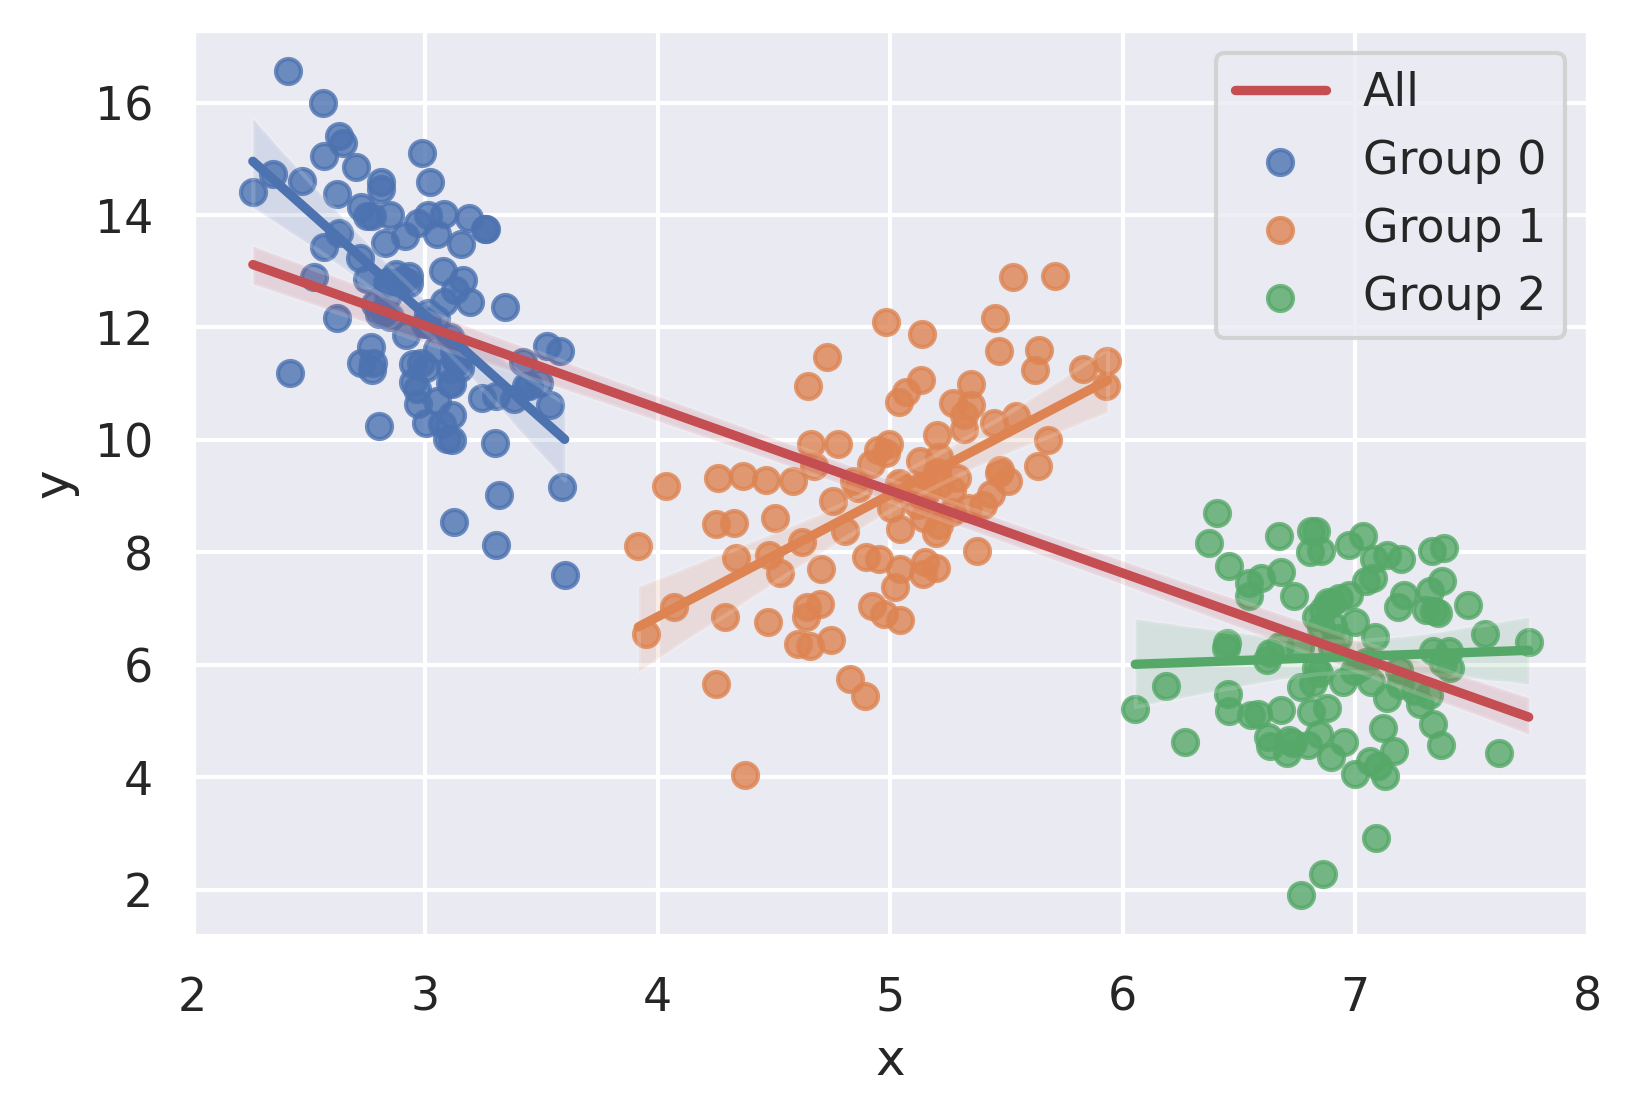

In [19]:
# Run this cell!
plt.figure(dpi=300)
for i in range(3):
    sns.regplot(
        data=simpsons_df[simpsons_df['Group'] == f'Group {i+1}'],
        x='x', y='y', label=f'Group {i}'
    )
sns.regplot(data=simpsons_df, x='x', y='y', label='All', scatter=False)
plt.xlim([2, 8])
plt.legend();

How do we interpret this? Should we trust the global trend showing `x` causes `y` to decrease? Or should we trust the local, group-wise trends and believe that the way `x` affects `y` depends on the group and other, potentially unknown, differences between the groups?

Without context, or some knowledge about the domain the data comes from, we have no way to resolve this paradox.

To practice some paradox resolution, let's imagine two different scenarios from which this data came from.

**Scenario 1:** YouTube Videos
- Each data point is a YouTube video
- `x` is the video length
- `y` is the % of viewers that finished the video
- `Group` indicates which YouTube channel the video is from

**Goal:** Make recommendations to channels on how to maximize viewer retention.

![](.images/toy_simpsons_youtube.png)

>**Your turn:**  
Armed with this context, would you trust the global trend or the group-wise trends? What recommendation would you make the channels?

In [20]:
""" Enter your answer below (no code):



""";

In [21]:
""" Our take:

The global trend indicates that longer videos have poorer viewer retention,
however if we are trying to make a recommendation to a single channel the global
trend is a poor way to recommend whether videos should be longer or not.

The variance in the trends between groups suggests that there are likely many
other important features of the videos that determine viewer retention besides
video length. The names of the channels give us clues as to what those might be.

For 3 Minute Crafts, perhaps viewers are looking for simpler crafts and have 
an expectation for no videos longer than 3 minutes.

For College Vlog, maybe viewers like longer vlogs since those explore deeper,
more interesting aspects of college that require more time to cover.

For How It's Made, there's no correlation so it seems that viewers don't care
much about how long the videos are.

To be sure though, we'd have to collect more data and learn more about the
differences between the channels' demographics and content!

""";

**Scenario 2:** Chemistry Experiments

Suppose three students are studying a reaction where reactants $$A$$ and $$B$$ combine to form a product $$C$$:<center>
$$ A + B \rightarrow C $$
</center>

- Each data point is an experimental trial where the concentration of $$A$$ is held constant
- `x` is the concentration of reactant $$B$$
- `y` is the time it takes for the reaction to finish
- `Group` is a student running trials

**Goal:** Determine how the reaction rate is dependent on the concentration of $$B$$.

![](.images/toy_simpsons_chem.png)

>**Your turn:**  
How does the reaction rate depend on the concentration of $$B$$? Do you trust the negative correlation from the global trend or is the relationship changing based on who performed the experiment? Why?

In [22]:
""" Enter your answer below (no code):



""";

In [23]:
""" Our take:

It is highly unlikely that the laws of nature changed between the trials ran
by different students. Thus, in this case, the global trend is more likely
to be reflective of reality than the group-wise trends. The differences
between groups can probably be attributed to experimental errors given that
the students are most likely following the protocols for the first time.
Perhaps the students had difficulty measuring out their reactants across
trials. They might also have had a hard time measuring when the reaction
was finished, especially since the context we provided didn't describe
that either!

""";

Great job finishing this section!

You've seen two examples exhibiting Simpson's paradox where the same data had to be interpreted differently depending on what it described. To resolve the paradox you relied on your domain knowledge about the data to make accurate interpretations.

If you'd like to see more examples of Simpson's paradox and how to resolve it, here's an [article](https://towardsdatascience.com/simpsons-paradox-and-interpreting-data-6a0443516765) explaining it more in depth.

Otherwise, feel free to move on to the next section where you'll practice what you've learned on real U.S. Census data.


## Jojo's Misleading Adventure
<p style='font-size:20px'>Misleading Data Visualizations</p>


<!-- <img src='.images/data_meme.jpg' style="margin-left:auto; margin-right:auto;" width=100%> -->



<center>

![](.images/data_meme.jpg)

</center>

**Jojo you needs your help!** He has found some trends between the percentage of blacks in a county and the percentage of people with college degrees, but he's not sure how to interpret them.

>Before we move on, **we need to be clear on this:** race does not directly affect any of the other non-demographic variables in the kit including median household income or the % of people with college degrees in a county. The correlations observed between these variables are mediated through complex social structures that are inherently biased.

This is a big reason why Jojo is concerned about making **equitable interpretations**. He wants your help to make sure his visualizations and interpretations are **considerate of minorities, not easily miscontrued, and accurate** — especially since there are many more demographic and socioeconomic features in the US Census data!

Below, you will use what you've learned about Simpson's paradox to **help him carefully interpret visualizations and change them to help avoid misinterpretations**.

<!-- Instead of having a robust and thorough analysis to show the whole story, we can hand-pick specific numbers/conditions to manipulate the interpretation. Without being tempered, such meticulously selected numbers can still fit a pre-determined narrative, thus mislead the general public. -->

>**Your turn:**  
Create a `regplot()` with `black` on the x-axis and `college` on the y-axis. Don't forget to compute the correlation coefficient.

>Your plot should look like this:  
![](.images/college_v_black.png)

>What does this plot & correlation tell you about the relationship between `black`, the percentage of blacks in each county, and `college`, the percentage of individuals with college degrees?

>We'll see soon how this plot is potentially misleading and how by simply subsetting the data differently we can manipulate its interpretation.

In [24]:
### Enter your code below: ###



##############################

In [25]:
# Solution

# sns.regplot(data=rep, x='black', y='college')
# rep['black'].corr(rep['college'])

# The correlation coefficient is very weak so this
# regression suggests that there is no relationship
# between black and college.

Before we go on, note that **this linear regression looks rather invalid. The data points do not follow the line well and the correlation coefficient is ~0**, which is another indicator that **we should discount this regression**.

>**Food for thought:**  
Does this mean that there isn't a relationship between `black` and `college` at all? Not quite. The poor fit of our linear regression only suggests that there isn't a *linear* relationship between `black` and `college`. There might be something non-linear going on, and we could also consider additional variables.

Jojo has also tried looking for different subsets of `rep` that have a positive relationship between `black` and `college`. In his first attempt, he's tried subsetting `rep` to the western region of the United States below:

-0.019171771414012644

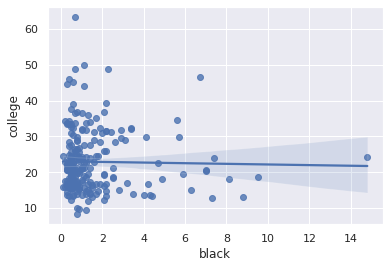

In [26]:
# Run this cell!
df = subset(rep, 'west')
sns.regplot(data=df, x='black', y='college')
df['black'].corr(df['college'])

Based on the regression plot and correlation coeffcient, that didn't change the relationship between `black` and `college`. Whether Jojo used the entire dataset in `rep` or subset it to the western states, the correlation is still ~0.

>**Your turn:**  
Help Jojo find the US Census region that has the strongest positive linear relationship between `black` and `college` in `rep`. Create a `regplot()` showing this and compute the correlation coefficient.

>What is this new regression plot telling you about the relationship between `black` and `college`?

>Do you think the new regression is valid? How well do the data fit the line?

>How might this plot be misleading or misconstrued? We'll learn how to help Jojo avoid this soon.

In [27]:
### Enter your code below: ###



##############################

In [28]:
# Solution

# df = subset(rep, 'northeast')
# sns.regplot(data=df, x='black', y='college')
# df['black'].corr(df['college'])

# After subsetting to select counties from the northeast, there is now
# a moderate positive correlation between black and college! This could
# be misleading if we don't explicitly state that this is for the 
# northeastern region of the US.

# Furthermore, despite the moderate correlation the data are not following
# the line very well. Much of the data is clustered to the left of the graph
# so we don't actually know much about what happens in counties with higher
# percentages of black individuals.

<center>

![](.images/cat_instinct.jpg)
</center>

<!-- TO MODIFY
As you can see, the slope of the regression line is going upwards as the percentage of black people increases. The scattering of points around the left edge is contributed by counties with very low percentages of black people, which is not too useful for our discussion. However, the regression line indicates that the counties with higher percentages of black people would have higher percentages of college attainability. -->

Jojo has also tried finding the subset `rep` with the **strongest negative correlation**. For example, he's tried filtering `rep` such that `black > 20` like so:

-0.14653145132331202

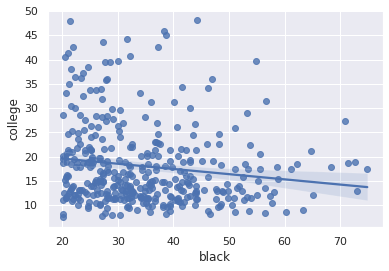

In [29]:
# Run this cell!
black_greater_than = rep['black'] > 20
df = rep[black_greater_than]
sns.regplot(data=df, x='black', y='college')
df['black'].corr(df['college'])

>**Your turn:**  
Select a subset of `rep` that has the strongest negative correlation between `black` and `college` you can find.

>Again, interpret the plot! What does the correlation and regression tell you about the relationship between `black` and `college`? Should you trust this regression? Is this plot misleading?

In [30]:
### Enter your code below: ###



##############################

In [31]:
# Solution

# df = rep[rep['black'] > 12.5]
# sns.regplot(data=df, x='black', y='college')
# df['black'].corr(df['college'])

# This yielded a correlation of -0.22, can you find one more extreme than that?

# By now, your trained eye should be able to tell that this regression is also
# quite poor. The correlation is moderate but the data do not follow the
# line well.

<center>

![](.images/jojo_meme2.jpeg)

In the examples above, the visualization were misleading because they did't show that they are selecting a subset of the data. Let's remedy this!

>**Your turn:**  
Add a `regplot()` of the full dataset "behind" the northeast subsetted regression plot from above. This will help show whether the trend in the subset is true in the rest of the data or not. It will also help to **add an informative legend that explains what the subset is**.

>Your plot should look something like this:
![](.images/northeast_black_v_college.png)

In [32]:
### Enter your code below: ###



##############################

In [33]:
# Solution

# sns.regplot(data=rep, x='black', y='college', label='All')

# northeast_rep = subset(rep, 'northeast')
# sns.regplot(data=northeast_rep, x='black', y='college', label='Northeast')
# plt.legend()

# northeast_rep['black'].corr(northeast_rep['college'])

You should notice that what we're seeing above is an instance of **Simpson's paradox**, where a trend in one subset of data is different in another, or even the whole dataset. For example, if we didn't know better we might expect the trend between `college` and `black` in the entire dataset (blue) to hold in any subset (e.g. orange). This is clearly not the case.

<center><img src="https://tabernadozezim.files.wordpress.com/2013/05/homer-simpson-doh-sound-effect-download-i15.jpg" width=200></center>

What about the subset with a negative correlation between `black` and `college`? Let's fix that one too to be less misleading.

>**Your turn:**  
Like before, add a `regplot()` of the full dataset "behind" the `black > X` subsetted regression plot from above. Don't forget to **add an informative legend that explains what the subset is**.

In [34]:
### Enter your code below: ###



##############################

In [35]:
# Solution

# sns.regplot(data=rep, x='black', y='college', label='All')

# black_greater_rep = rep[rep['black'] > 12.5]
# sns.regplot(data=black_greater_rep, x='black', y='college', label=f'Black > 12.5')
# plt.legend()

# black_greater_rep['black'].corr(black_greater_rep['college'])

So what's really going on here? The trend between `black` and `college` seems to be changing in different ways as we look at different subsets. Recall from the section on Simpson's paradox how we should approach interpreting this.

Is this scenario more similar to the one about YouTube viewer retention, or chemistry? How did we resolve the paradox in those situations?

Unlike with the chemistry experiment, we can't claim that the relationship between `college` and `black` should be the same in every county or not. In fact, we can be almost certain that there are many, many factors that affect how many individuals in a county have college degrees. Can you think of some non-racial factors that would affect this?

> **What would you recommend Jojo do next?**

We would tell Jojo to think critically about the trends he's observing and look for other variables that contribute to or mediate the effect between race and variables related to socioeconomic status.

As you work on your own project, we hope you'll be cautious about interpreting variables' relationships. Be sure to check if other subsets of data have different trends and think about other factors that could affect the variable you're interested in.

# Finished! (almost...)

<center>

<img src='https://i.kym-cdn.com/photos/images/facebook/001/585/311/63e.png' width=300>

Congratulations! You finished the starter kit! You've learned to use many new tools to understand data and how to interpret your visualizations. Now, it's time to start your own project.

## What To Do Next
Create a new notebook for your project! Start thinking of ideas, plots, and analyses you can make using the 2016 US primary dataset we've provided you.
  
To start a new notebook, click the folder icon in the top right if it's not open already, and then click the + icon above the files section. A drop down list should appear, where you can click on 'New Notebook'.

<center>

![](.images/new_notebook.png)

Click the "Share" in the upper right corner of your new Notebook. In the drop down menu, click "Manage collaborators" and either share the link or invite your teammates via email. If you share the link, make sure to have it where "Anyone with a link can **edit** this project."

<center>

![](.images/share_button.png)


From here, make sure to import all the necessary packages and the data (you can copy-paste the "Imports & Loading Data" cell)!

## Project Inspiration

### Big Questions
As you start your own projects, we'd encourage you to try all tools you've learned so far to discover and visualize trends. However, your most important tool for this project will be **your curiosity!**

One way to go about your project is to **try answering questions that interest you**. If you're not sure what questions to ask, we've put a diagram below that we hope might help.

The arrows indicate causality between different variables that you can try to prove or disprove. For example, it suggests that `Location`, or where someone lives, influences how they would vote. You could investigate whether this is true with your newly minted data science toolbox.

Also, note the `?` boxes: the diagram is **not** comprehensive so there could be other variables that belong in the diagram that are not being shown. If you chose to, you could try and figure out what those `?` variables should be!

>**Disclaimer:**  
The diagram below is a high-level oversimplification that is **not** ground truth.

![](.images/suggestive_model.png)

### Get Technical

Another great way to find new things to try is to go through the documentation for [seaborn](https://seaborn.pydata.org/) and [matplotlib](https://matplotlib.org/stable/contents.html) and **look at examples of other visualizations**. You might have even seen some of them in the data visualization pitch at the start of the hackathon!

On June 27 there will also be a workshop on **machine learning**. This is an incredibly powerful tool for prediction and inference that could, for example, help you characterize the counties Hillary won without as much legwork or learn to predict the winners of the election.

Finally, if you're feeling competitive keep in mind the [judging criteria](https://www.notion.so/Data-Viz-Judging-Criteria-a6250cb9a677459d878307f58bb252d6) for your project. You'll need to score as highly as you can in each criteria to win some big prizes!

## Where to get help if you get stuck? 

Don't hestitate to ask your TritonHacks mentor or any of the tutors for help! You can reach out to them through Discord or CampusWire.

**Otherwise, the Internet/Google is your best friend!**  
- Coding tutorial website: geekforgeeks, w3schools
- Any data science blog posts you come across
- Documentation: [Python](https://docs.python.org/3/), [pandas](https://pandas.pydata.org/docs/), [seaborn](https://seaborn.pydata.org/), [matplotlib](https://matplotlib.org/stable/contents.html)
- Online forums: stackoverflow

## Submission

When you're finished with your project you can submit it to the [TritonHacks Devpost](https://tritonhacks-2021.devpost.com/).

<p style='font-size:30px'><b>Good luck and have fun!</b><p>

## Credits
This kit is the joint work of Audrey Zhao, David Laub, Emily Chen, and Renyi Zhao.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6db671ff-4b94-4ec9-9d8f-30a849bb0caf' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>